# America’s Shopping Cart: The Public Health Impacts of Warehouse Infrastructure in the Inland Empire (Part B)
**UP206A Midterm | Winter 2021 | By: Angelica Ruiz**

Since the CalEnviroScreen 3.0 data is too large in combination with the other data I imported in Part A, I'll be finishing my analysis in a Part B.

# Data

## Load Libraries

In [61]:
#load libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py

Now that I've loaded my libraries, I'm going to import the following datasets:

- [CalEnviroScreen 3.0](https://oehha.ca.gov/calenviroscreen/maps-data/download-data)
- CalEnviroScreen Asthma Only (downloaded as csv)
- Warehouse data (received from a UCSD student)

## Import Data

In [2]:
#import ces data
ces_gdf = gpd.read_file('CES/CES3June2018Update.shp')

In [3]:
#import ces asthma only csv
asthma_gdf = pd.read_csv('CES/ces_asthma.csv')
asthma_gdf.head()

,Census Tract,Total Population,California County,Longitude,Latitude,Asthma_Pctl
0,6071001600,6133,San Bernardino,-117.618013,34.057780,69.78
1,6071004900,7590,San Bernardino,-117.316879,34.100314,96.61
2,6065030300,4497,Riverside,-117.376385,33.979827,94.53
3,6071005701,2216,San Bernardino,-117.292606,34.100640,97.68
4,6065030502,2220,Riverside,-117.356051,33.985742,70.75


In [4]:
#change column names
asthma_gdf.columns = ['census_tract',
                      'total_population',
                      'california_county',
                      'longitude',
                      'latitude',
                      'asthma_pctl']
asthma_gdf.head()

,census_tract,total_population,california_county,longitude,latitude,asthma_pctl
0,6071001600,6133,San Bernardino,-117.618013,34.057780,69.78
1,6071004900,7590,San Bernardino,-117.316879,34.100314,96.61
2,6065030300,4497,Riverside,-117.376385,33.979827,94.53
3,6071005701,2216,San Bernardino,-117.292606,34.100640,97.68
4,6065030502,2220,Riverside,-117.356051,33.985742,70.75


In [5]:
#import warehouse data
warehouse_gdf = pd.read_csv('warehouses/warehouse_locations.csv')
warehouse_gdf.head()

,Warehouse,Latitude,Longitude
0,Costco,33.999390,-117.55837
1,Universal Shipping Inc. a RAK Logistics Compan...,34.020710,-117.51923
2,Inland Empire Cold Storage,34.032349,-117.37912
3,Amazon Distribution DCA2,34.000990,-117.55467
4,Amazon Fulfillment Center - LGB3,34.000990,-117.55467


## Clean CalEnviroScreen Dataset

Before I begin any analysis, I'm first going to clean up the CalEnviroScreen dataset. It contains all the census tracts in CA and I'm only interested in two counties.

In [6]:
#take a peek inside the file
ces_gdf.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,...,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,...,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,...,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,0.035,...,0.6,4.0,2.6,7864,1,1,6558.956142,2.417717e+06,1-5% (lowest scores),"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,0.035,...,0.8,3.5,3.2,7863,1,1,6570.368642,2.608422e+06,1-5% (lowest scores),"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


### Subset Data: Only Include Riverside and San Bernardino Counties

In [7]:
#only keep Riverside and San Bernardino Counties
ces_ie = ces_gdf.loc[ces_gdf['California'].isin(['Riverside', 'San Bernardino'])]
ces_ie.head(-10)

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
3525,6.071010e+09,4817,San Bernardino,92392,Victorville,-117.356568,34.478278,32.05,63,0.065,...,0.4,4.1,3.0,3070,7,13,6446.067750,2.234623e+06,60-65%,"POLYGON ((242536.589 -390593.956, 242014.688 -..."
3526,6.071010e+09,4653,San Bernardino,92392,Victorville,-117.340701,34.490262,33.14,65,0.065,...,0.3,3.8,3.0,2679,7,14,10682.341723,4.376862e+06,65-70%,"POLYGON ((244643.842 -386686.546, 244651.334 -..."
3527,6.071009e+09,22862,San Bernardino,92392,Victorville,-117.428884,34.486497,21.60,42,0.065,...,0.4,5.1,3.3,4611,5,9,30656.735175,4.762563e+07,40-45%,"POLYGON ((242295.882 -386571.955, 240430.952 -..."
3528,6.071010e+09,6456,San Bernardino,92392,Victorville,-117.358124,34.494098,24.17,48,0.065,...,0.6,4.8,2.9,4221,5,10,9149.886130,4.521891e+06,45-50%,"POLYGON ((243107.997 -386548.632, 243120.247 -..."
3529,6.071010e+09,4941,San Bernardino,92392,Victorville,-117.372900,34.476874,28.29,57,0.065,...,0.3,3.8,3.0,3448,6,12,6570.765315,2.451707e+06,55-60%,"POLYGON ((240303.166 -390663.295, 240001.277 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,6.065043e+09,5993,Riverside,92587,Sun City,-117.225585,33.692413,15.93,28,0.060,...,0.2,4.7,3.1,5742,3,6,14914.996372,8.127566e+06,25-30%,"POLYGON ((257490.630 -475495.774, 257689.470 -..."
4354,6.065043e+09,5768,Riverside,92585,Sun City,-117.221427,33.737713,27.87,56,0.062,...,0.3,3.5,1.9,3399,6,12,24428.403911,2.060166e+07,55-60%,"POLYGON ((258650.219 -468395.441, 259846.187 -..."
4355,6.065043e+09,5338,Riverside,92585,Sun City,-117.166693,33.759282,35.65,70,0.065,...,0.3,1.7,1.5,2637,7,14,19783.389662,1.687245e+07,65-70%,"POLYGON ((260181.367 -467124.137, 260203.737 -..."
4356,6.065043e+09,9184,Riverside,92584,Menifee,-117.165786,33.703730,21.19,41,0.062,...,0.4,5.4,2.5,4567,5,9,12964.034877,9.396258e+06,40-45%,"POLYGON ((263954.794 -477133.731, 262335.522 -..."


### Delete Columns

In [8]:
#list column names
list(ces_ie)

['tract',
 'pop2010',
 'California',
 'ZIP',
 'City',
 'Longitude',
 'Latitude',
 'CIscore',
 'CIscoreP',
 'ozone',
 'ozoneP',
 'pm',
 'pmP',
 'diesel',
 'dieselP',
 'drink',
 'drinkP',
 'pest',
 'pestP',
 'RSEIhaz',
 'RSEIhazP',
 'traffic',
 'trafficP',
 'cleanups',
 'cleanupsP',
 'gwthreats',
 'gwthreatsP',
 'haz',
 'hazP',
 'iwb',
 'iwbP',
 'swis',
 'swisP',
 'Pollution',
 'PollutionS',
 'PollutionP',
 'asthma',
 'asthmaP',
 'lbw',
 'lbwP',
 'cvd',
 'cvdP',
 'edu',
 'eduP',
 'ling',
 'lingP',
 'pov',
 'povP',
 'unemp',
 'unempP',
 'housingB',
 'housingBP',
 'PopChar',
 'PopCharSco',
 'PopCharP',
 'Children_u',
 'Pop_11_64_',
 'Elderly_ov',
 'Hispanic_p',
 'White_pct',
 'African_Am',
 'Native_Ame',
 'Asian_Amer',
 'Other_pct',
 'OBJECTID_1',
 'CIdecile',
 'CIvigintil',
 'Shape_Leng',
 'Shape_Area',
 'CES2018_Rn',
 'geometry']

In [11]:
#columns to keep
columns_to_keep = ['tract',
                   'pop2010',
                   'California',
                   'ZIP',
                   'City',
                   'Longitude',
                   'Latitude',
                   'ozone',
                   'ozoneP',
                   'diesel',
                   'dieselP',
                   'asthma',
                   'asthmaP',
                   'cvd',
                   'cvdP',
                   'Shape_Leng',
                   'Shape_Area',
                   'geometry']    

In [12]:
#redefine to only include the `columns_to_keep`
ces_ie = ces_ie[columns_to_keep]
ces_ie.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,ozone,ozoneP,diesel,dieselP,asthma,asthmaP,cvd,cvdP,Shape_Leng,Shape_Area,geometry
3525,6.071010e+09,4817,San Bernardino,92392,Victorville,-117.356568,34.478278,0.065,98,10.80,31,87.54,88,17.31,100,6446.067750,2.234623e+06,"POLYGON ((242536.589 -390593.956, 242014.688 -..."
3526,6.071010e+09,4653,San Bernardino,92392,Victorville,-117.340701,34.490262,0.065,98,16.21,49,87.54,88,17.31,100,10682.341723,4.376862e+06,"POLYGON ((244643.842 -386686.546, 244651.334 -..."
3527,6.071009e+09,22862,San Bernardino,92392,Victorville,-117.428884,34.486497,0.065,98,7.04,19,86.44,88,17.07,99,30656.735175,4.762563e+07,"POLYGON ((242295.882 -386571.955, 240430.952 -..."
3528,6.071010e+09,6456,San Bernardino,92392,Victorville,-117.358124,34.494098,0.065,98,10.33,30,87.54,88,17.31,100,9149.886130,4.521891e+06,"POLYGON ((243107.997 -386548.632, 243120.247 -..."
3529,6.071010e+09,4941,San Bernardino,92392,Victorville,-117.372900,34.476874,0.065,98,10.73,31,87.54,88,17.31,100,6570.765315,2.451707e+06,"POLYGON ((240303.166 -390663.295, 240001.277 -..."


# Charts

Now that I have cleaned the CalEnviroScreen dataset, it's time for some charts to get an idea of the health and pollution indicators.

## Diesel PM Emissions

In [13]:
#first, let's see distinct values for dieselP for each county
diesel_count = ces_ie.dieselP.value_counts().reset_index()
diesel_count

,index,dieselP
0,47,20
1,45,17
2,19,17
3,42,17
4,90,16
...,...,...
93,75,2
94,76,2
95,73,1
96,84,1


In [14]:
# rename the columns
diesel_count.columns = ['Diesel PM Pecentile','Frequency']
diesel_count

,Diesel PM Pecentile,Frequency
0,47,20
1,45,17
2,19,17
3,42,17
4,90,16
...,...,...
93,75,2
94,76,2
95,73,1
96,84,1


In [66]:
# plot it
bar = px.bar(diesel_count,
       x = 'Diesel PM Pecentile',
       y = 'Frequency',
       title = 'Diesel PM Pecentile of Inland Empire Counties')
bar

In [72]:
#save for later use
py.offline.plot(bar, filename="bar.html")

'bar.html'

The x-axis of this graph shows the percentiles that the zip codes fall under for CalEnviroScreen. A higher percentile means that that zip code is higher than other zip codes in the state. So as shown on this map, the frequency of percentile is 47; this means that 20 of the zip codes in the Inland Empire have diesel PM emission higher than 47% of the state's census tracts.

# Maps!

## Health in the Inland Empire

Next, I'm going to create maps for asthma and cardiovascular disease percentile in each census tract. 

### CVD

Text(0.5, 1.0, 'Cardiovascular Disease in the Inland Empire')

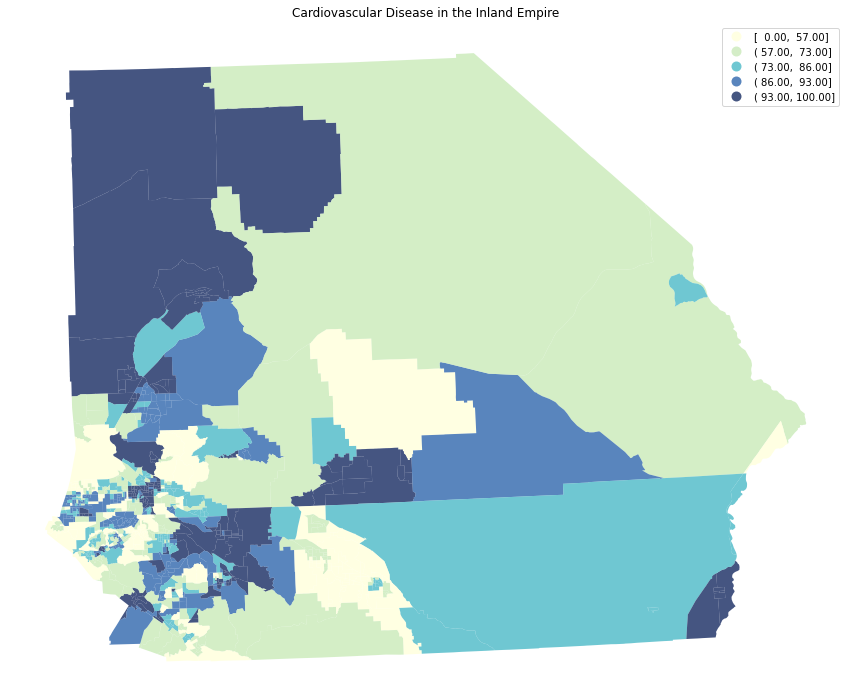

In [53]:
#subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 15))

#next, give each subplot a name
ax = axs


#cvd
ces_ie.plot(column='cvdP', 
            cmap='YlGnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True,
           )

#title and axis
ax.axis("off")
ax.set_title("Cardiovascular Disease in the Inland Empire")

### Asthma

In [26]:
#get mean of asthma rate
asthma_mean = asthma_gdf.asthma_pctl.mean()
asthma_mean

55.71772228989037

In [73]:
#plot it!
fig = px.scatter_mapbox(asthma_gdf, 
                        lat="latitude", 
                        lon="longitude", 
                        color="asthma_pctl",
                        labels={'City':'City'},
                        mapbox_style="stamen-terrain",
                        size="asthma_pctl",
                        size_max=40, 
                        color_continuous_scale = 'RdYlGn_r',
                        range_color = (0,asthma_mean * 2)
                       )

fig.show()

#save for later use
py.offline.plot(fig, filename="fig.html")

'fig.html'

## Pollution in the Inland Empire

Next, I'm going to create maps for diesel PM and ozone percentile in each census tract for the Inland Empire.

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:235: UserWarning:


/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning:




Text(0.5, 1.0, 'Ozone in the Inland Empire')

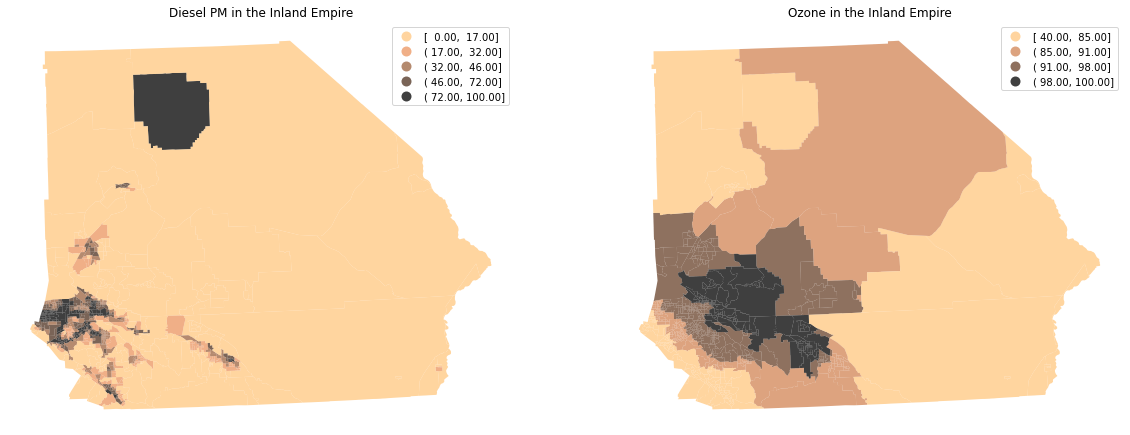

In [24]:
#subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

#next, give each subplot a name
ax1, ax2 = axs

#axis and title
ax1.axis('off')
ax1.set_title('Diesel PM in the Inland Empire')

#diesel
ces_ie.plot(column='dieselP', 
            cmap='copper_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True, 
           )

#ozone
ces_ie.plot(column='ozoneP', 
            cmap='copper_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True,
           )

ax2.axis("off")
ax2.set_title("Ozone in the Inland Empire")

As we can see from the maps above, there is significant concentrated pollution--both diesel PM and ozone--in census tracts of the Inland Empire. Due to the size of some census tracts in San Bernardino County, we're unable to see the extent of pollution for diesel PM. However, the ozone is visible even from the scale we're seeing it at. One thing to note is that for ozone, the lowest percentile is 40. So, the lightest color census tracts are still at least 40% more polluted with ozone than other census tracts in the state.

# Next Steps

This preliminary mapping and analysis has provided me with good insight into how health and environmental indicators are distributed throughout the Inland Empire. For next steps, I might explore the idea of separating Riverside and San Bernardino Counties in my mapping. This might provide me with finer visual analysis and may be more impactful. Additionally, I'd like to clean up the land-use data and see if I'm able to map that along with the health and environmental demographics of the Inland Empire. Lastly, I'd like to find additional warehouse locations so that I'm able to overlay them with the various indicators that I'm interested in analyzing.